In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Basic ICP Coding
Implementing a basic ICP algorithm with (given) known correspondences. 
Let X be the point cloud observed from the initial position. The robot moved and observed P1 as the current point cloud. Same with P2 under a different transformation. Now we wish to apply ICP to recover transformation between (X & P1) and (X & P2). We use *root mean squared error (rmse)* as the error metric.

In [2]:
# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
    plt.cla()
    plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
    plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
    plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
    plt.legend(('X', 'P', 'P0'), loc='lower left')
    plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
    plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
    plt.axis([-10, 15, -10, 15])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    plt.pause(2)
    return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
    X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise (AWGN - additive white gaussian noise)
    P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
    P[0,:] = P[0,:] + 1
    P[1,:] = P[1,:] + 1
  
  # rotate
    theta1 = ( 10.0 / 360) * 2 * np.pi
    theta2 = (110.0 / 360) * 2 * np.pi
    rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
    rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
    P1 = np.dot(rot1, P)
    P2 = np.dot(rot2, P)
  
    return X, P1, P2

In [3]:
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)

# Getting data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# Applying ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # current error?
        rmse = rms(X,P)
        # calling the visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # Implementation of ICP to get R, t
        #Computing the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Computing a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Using the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Using the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return

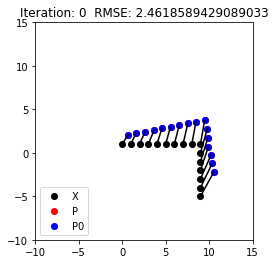

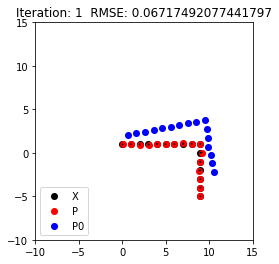

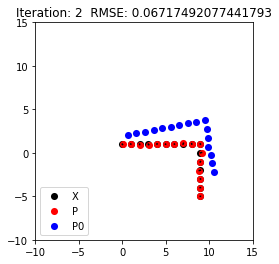

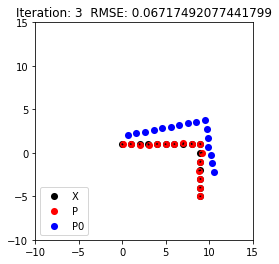

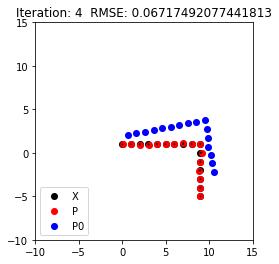

In [4]:
ICP(X,P1) 

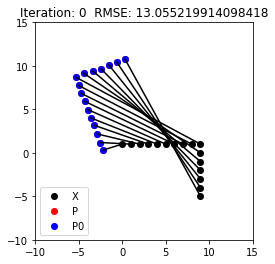

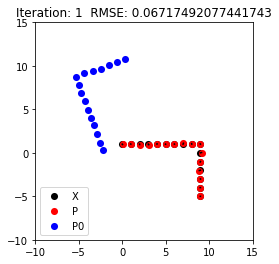

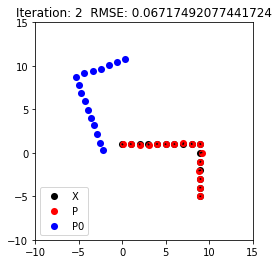

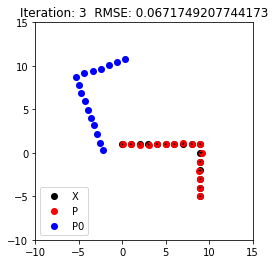

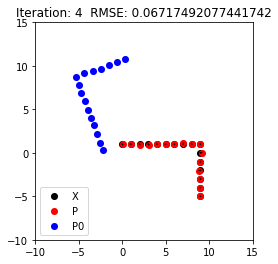

In [5]:
ICP(X,P2) 

It is trivial that the algorithm would converge in 1 iteration since the correspondences are known. This is also intuitively fathomable. 